In [ ]:
# !pip install imblearn
# !pip install xgboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve
import os
from imblearn.over_sampling import SMOTE
import imblearn
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import cross_val_score


In [3]:
# bucket = 'strokedata'  # replace with your bucket name
# file_key = 'healthcare-dataset-stroke-data.csv'  # replace with your file key
#
# s3_client = boto3.client('s3')
# obj = s3_client.get_object(Bucket=bucket, Key=file_key)
# data = pd.read_csv(obj['Body'])
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

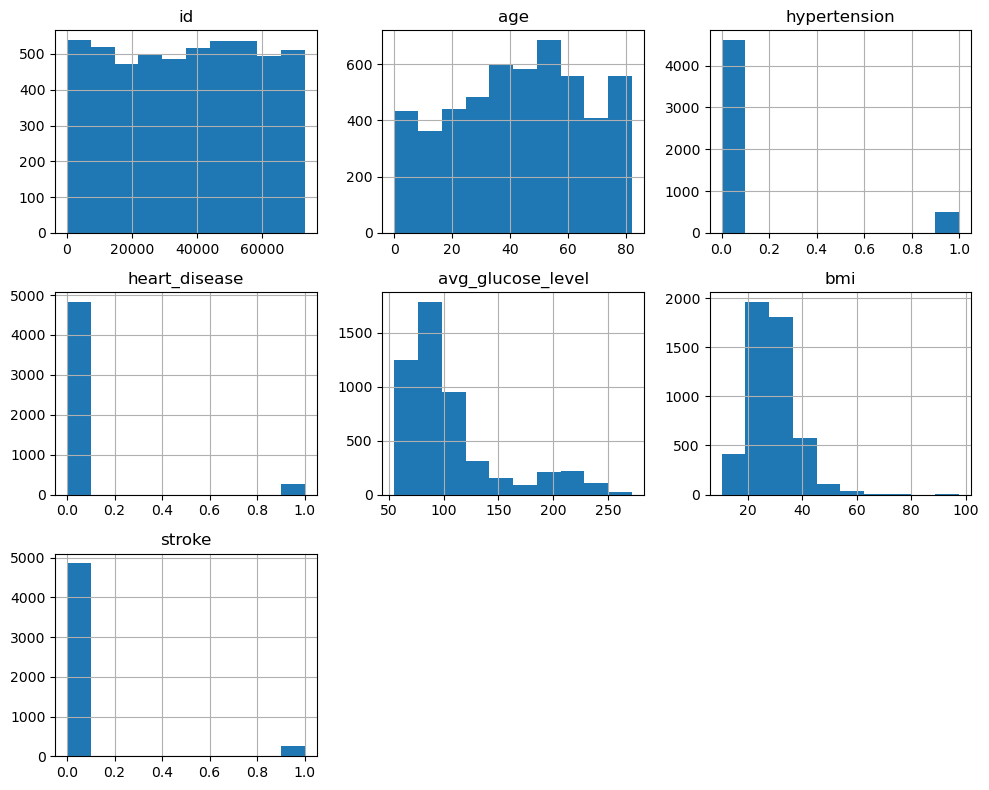

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


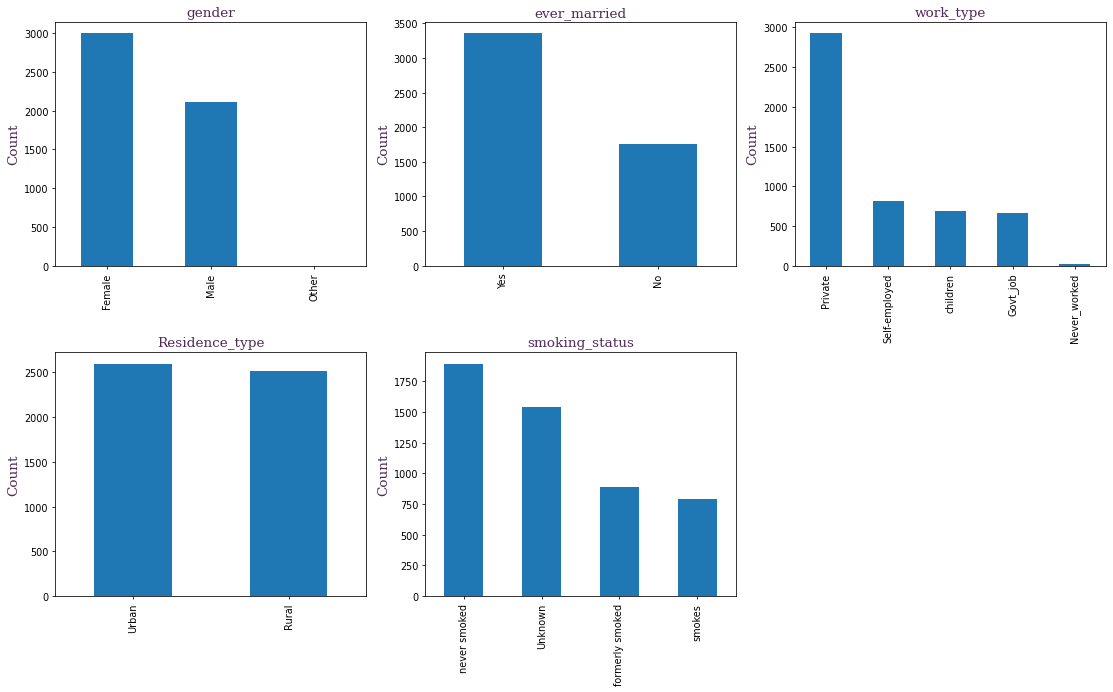

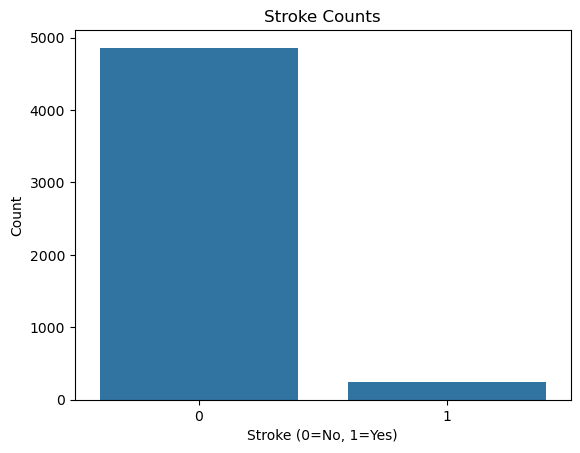

In [5]:
import matplotlib.pyplot as plt
fig = df.hist(figsize=(10,8))
plt.tight_layout()
plt.show()
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)
ncols = 3
nrows = np.ceil(len(categorical_cols) / ncols).astype(int)
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 10), dpi=70)
axs = axs.flatten()
for i, col in enumerate(categorical_cols):
    df[col].value_counts().plot(kind='bar', ax=axs[i])
    axs[i].set_title(col, fontdict={'fontname': 'Serif', 'fontsize': 14, 'color': '#512b58'})
    axs[i].set_xlabel("")
    axs[i].set_ylabel("Count", fontdict={'fontname': 'Serif', 'fontsize': 14, 'color': '#512b58'})
for i in range(len(categorical_cols), len(axs)):
    fig.delaxes(axs[i])
plt.tight_layout()
plt.show()

# Plot a bar chart of the stroke variable
sns.countplot(x='stroke', data=df)
plt.title('Stroke Counts')
plt.xlabel('Stroke (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

In [6]:
# Label Encoding
categorical_col=['gender','ever_married','work_type','Residence_type','smoking_status']
le = LabelEncoder()
for col in categorical_col:
  df[col] = le.fit_transform(df[col])

In [7]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

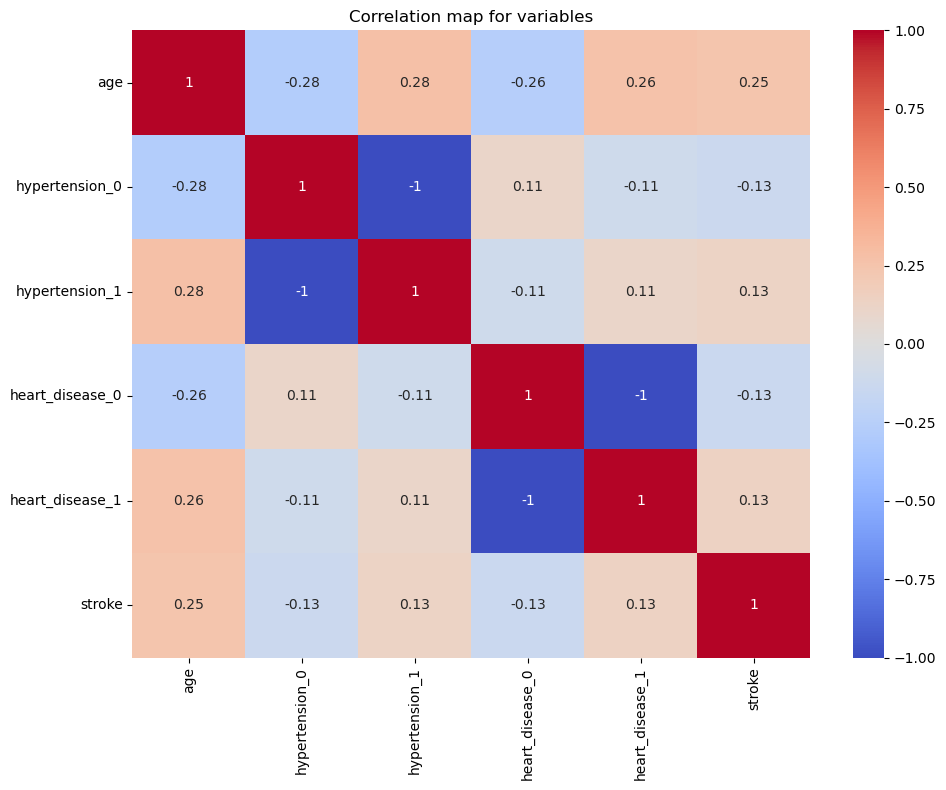

                      age  hypertension_0  hypertension_1  heart_disease_0  \
age              1.000000       -0.276398        0.276398        -0.263796   
hypertension_0  -0.276398        1.000000       -1.000000         0.108306   
hypertension_1   0.276398       -1.000000        1.000000        -0.108306   
heart_disease_0 -0.263796        0.108306       -0.108306         1.000000   
heart_disease_1  0.263796       -0.108306        0.108306        -1.000000   
stroke           0.245257       -0.127904        0.127904        -0.134914   

                 heart_disease_1    stroke  
age                     0.263796  0.245257  
hypertension_0         -0.108306 -0.127904  
hypertension_1          0.108306  0.127904  
heart_disease_0        -1.000000 -0.134914  
heart_disease_1         1.000000  0.134914  
stroke                  0.134914  1.000000  


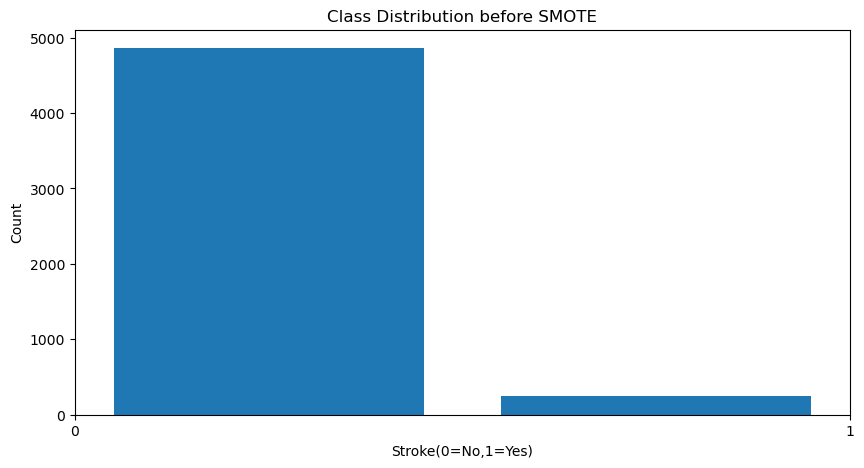

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Class counts before SMOTE oversampling:
Class 0 : 3901
Class 1 : 187
Class counts after SMOTE oversampling:
Class 0 : 3901
Class 1 : 3901


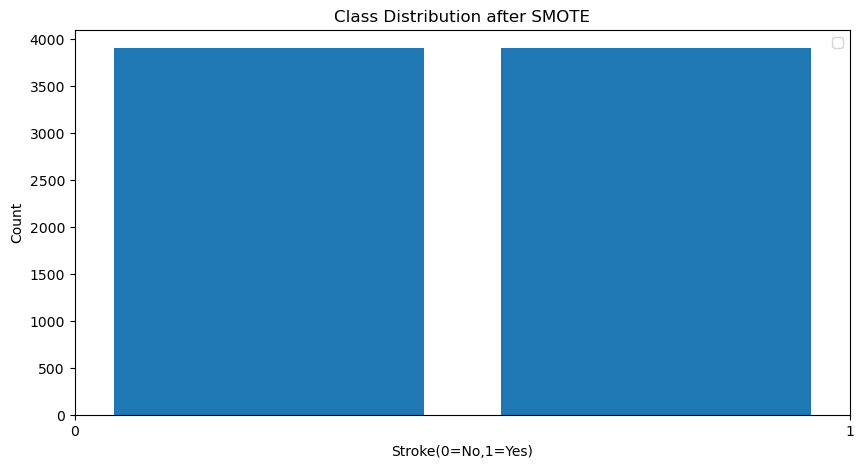

In [8]:
df = pd.get_dummies(df, columns=['gender','hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type','smoking_status'])


In [9]:
# Feature Engineering:
df = df[['age', 'hypertension_0', 'hypertension_1', 'heart_disease_0', 'heart_disease_1', 'stroke']]
# df = df[['age', 'hypertension', 'heart_disease', 'stroke']]
X = df.drop(['stroke'], axis=1)

y = df['stroke']
# HeatMap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation map for variables')
plt.tight_layout()
plt.show()
correlation = df.corr()
print(correlation)

# # SPLIT TEST AND TRAIN PART
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
plt.figure(figsize=(10, 5))
plt.title("Class Distribution before SMOTE")
plt.hist(y, bins=2, rwidth=0.8)
plt.xticks([0, 1])
plt.xlabel("Stroke(0=No,1=Yes)")
plt.ylabel("Count")
plt.show()
unique, counts = np.unique(y_train, return_counts=True)


# Print the count of instances in each class before oversampling
print("Class counts before SMOTE oversampling:")
for i in range(len(unique)):
    print("Class", unique[i], ":", counts[i])

    
# Apply SMOTE oversampling
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Count the number of instances in each class after oversampling
unique, counts = np.unique(y_train, return_counts=True)


# Print the count of instances in each class after oversampling
print("Class counts after SMOTE oversampling:")
for i in range(len(unique)):
    print("Class", unique[i], ":", counts[i])
plt.figure(figsize=(10, 5))
plt.title("Class Distribution after SMOTE")
plt.hist(y_train, bins=2, rwidth=0.8)
plt.xticks([0, 1])
plt.xlabel("Stroke(0=No,1=Yes)")
plt.ylabel("Count")
plt.legend()
plt.show()

In [10]:
scaler = StandardScaler()

cols = X_train.columns

scaler.fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=cols)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib

# Train your Random Forest model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_scaled, y_train)

# Save the model to a file
joblib.dump(model, 'random_forest_model.joblib')

In [11]:
import sagemaker
from sagemaker.session import Session

sagemaker_session = sagemaker.Session()

In [12]:
# Split data into features (X) and target (y)
# from sklearn.model_selection import train_test_split_test_split
# X = data.drop('stroke', axis=1)
# y = data['stroke']

# # Split the data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# # Prepare data for XGBoost (target variable in the first column)
# train_data = pd.concat([y_train, X_train], axis=1)
# validation_data = pd.concat([y_val, X_val], axis=1)
import os
import sagemaker
from sagemaker.inputs import TrainingInput
from sagemaker.session import Session

# Other imports and preprocessing steps...
X_train_scaled = pd.concat([y_train, X_train_scaled], axis=1)

# Save the processed data to CSV files
X_train_scaled.to_csv('X_train.csv', header=False, index=False)
pd.DataFrame(y_train).to_csv('y_train.csv', header=False, index=False)

# Upload the processed data to S3
train_data_s3_path = sagemaker_session.upload_data('X_train.csv', bucket=bucket, key_prefix='data')
train_label_s3_path = sagemaker_session.upload_data('y_train.csv', bucket=bucket, key_prefix='data')

# Create TrainingInput objects
train_data = TrainingInput(train_data_s3_path, content_type='csv')
train_label = TrainingInput(train_label_s3_path, content_type='csv')


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker:Creating training-job with name: xgboost-2023-11-26-23-51-32-165


2023-11-26 23:51:32 Starting - Starting the training job...
2023-11-26 23:51:58 Starting - Preparing the instances for training.........
2023-11-26 23:53:21 Downloading - Downloading input data...
2023-11-26 23:53:51 Training - Downloading the training image......
2023-11-26 23:54:56 Uploading - Uploading generated training modelArguments: train
[2023-11-26:23:54:52:INFO] Running standalone xgboost training.
[2023-11-26:23:54:52:INFO] Path /opt/ml/input/data/validation does not exist!
[2023-11-26:23:54:52:INFO] File size need to be processed in the node: 0.73mb. Available memory size in the node: 8542.23mb
[2023-11-26:23:54:52:INFO] Determined delimiter of CSV input is ','
[23:54:52] S3DistributionType set as FullyReplicated
[23:54:52] 7802x5 matrix with 39010 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
[23:54:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[0]#011train-error:0.243271
[23:54


2023-11-26 23:55:13 Completed - Training job completed
Training seconds: 112
Billable seconds: 112


In [13]:
# Assuming you have preprocessed the dataset and chosen a model (e.g., XGBoost)

from sagemaker.amazon.amazon_estimator import get_image_uri

role = get_execution_role()
container = get_image_uri(boto3.Session().region_name, 'xgboost')

xgb = sagemaker.estimator.Estimator(container,
                                    role, 
                                    train_instance_count=1, 
                                    train_instance_type='ml.m4.xlarge',
                                    output_path='s3://{}/output'.format(bucket),
                                    sagemaker_session=sagemaker_session)

xgb.set_hyperparameters(max_depth=3,
                        eta=0.2,
                        gamma=4,
                        min_child_weight=4,
                        subsample=0.8,
                        objective='binary:logistic',
                        num_round=50)

# Assuming 'train_data' and 'validation_data' are already prepared
# xgb.fit({'train': X_train_scaled, 'validation': y_train})
xgb.fit({'train': train_data})#, 'validation': train_label})

INFO:sagemaker:Creating model with name: xgboost-2023-11-26-23-55-45-292
INFO:sagemaker:Creating endpoint-config with name xgboost-2023-11-26-23-55-45-292
INFO:sagemaker:Creating endpoint with name xgboost-2023-11-26-23-55-45-292


------!

In [14]:
predictor = xgb.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge')

age                float64
hypertension_0       int64
hypertension_1       int64
heart_disease_0      int64
heart_disease_1      int64
dtype: object


In [19]:
X_test = X_test.replace({True: 1, False: 0})
print(X_test.dtypes)
X_test_scaled = scaler.transform(X_test)

import io
csv_buffer = io.StringIO()
X_test.to_csv(csv_buffer, header=False, index=False)
csv_payload = csv_buffer.getvalue()

# import numpy as np
# csv_payload = "\n".join([",".join(item) for item in X_test.astype(str)])


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [16]:
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer

# Set the serializer and deserializer
predictor.serializer = CSVSerializer()
# predictor.deserializer = JSONDeserializer()

response = predictor.predict(csv_payload)
# print(response)
predictions = response.decode('utf-8').split(',')
predicted_labels = [round(float(pred)) for pred in predictions]
print(predicted_labels)

Accuracy: 0.06164383561643835
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       960
           1       0.06      1.00      0.11        62

    accuracy                           0.06      1022
   macro avg       0.53      0.50      0.06      1022
weighted avg       0.94      0.06      0.01      1022

Confusion Matrix:
 [[  1 959]
 [  0  62]]


In [17]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Assuming y_test is your true labels
print("Accuracy:", accuracy_score(y_test, predicted_labels))
print("Classification Report:\n", classification_report(y_test, predicted_labels))
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted_labels))

In [ ]:
# predictor.delete_endpoint()